# Python_medium

製薬企業の仕事では、化合物の構造を扱うことがよくあります。
自社で合成した新薬候補の化合物やその代謝物、および生体内にもともと存在する内因性の代謝産物（アミノ酸、糖、脂質など）の濃度測定や構造解析をするスキルは重要です。

そこでここでは、生体内に存在する脂質の網羅的解析であるLipidomics（リピドミクス）を題材としてPythonのプログラミングについて解説していきます。
脂質は、様々な構造を持つ分子種が生体内に存在しており、*in silico*で構造を生成できる分子種は100万種を越えます。
こうした分子種の構造を一つ一つ記述したり、分子量や極性などの物性値を算出したりするのは手作業では現実的に難しく、プログラミングが必須になります。

脂質の構造や物性値をプログラミングで扱えるようになれば、新薬候補化合物を対象とするケモインフォマティクスにも応用が利きますので、是非習得してもらえればと思います。

## 1. 変数とデータ型

`変数 = 値`とすることで、新しい変数を作成することができます。

また、`print()`を使うことで、かっこ内のオブジェクト（変数の値やプログラムの実行結果など）を出力することができます。

`# `以降の文字列はコメントとして認識され、プログラムの実行範囲からは除外されます。
スクリプトの中にメモを書いたり、エラーが出る部分を実行されないようにしたりするときに使えます。

### 1.1. 文字列と数値

In [1]:
lipid_class = 'FA' # 文字列
Cn = 16 # 数値
Un = 0 # 数値

print(lipid_class) # 変数「lipid_class」の値を出力
print(Cn) # 変数「Cn」の値を出力
print(Un) # 変数「Un」の値を出力

FA
16
0


以下に示すように、複数の変数を1行で作成することもできます。

また、`print(オブジェクト1, オブジェクト2)`とすることで、`オブジェクト1 （半角スペース）オブジェクト2`と出力されます。
半角スペースを別の文字や記号にしたい場合は、`sep=`で変更できます。
`sep=''`とすると、`オブジェクト1`と`オブジェクト2`がスペースなしで連結されて出力されます。

In [2]:
Cn, Un = 16, 0 # 「Cn = 16、Un = 0」という意味
print(Cn) # 「16」と出力される
print(Un) # 「0」と出力される
print(Cn, Un) # 「16 0」と出力される
print(Cn, Un, sep='と') # 「16と0」と出力される

16
0
16 0
16と0


変数名は基本的に英単語を使い、数字から始まる変数名をつけることはできません（2文字目以降であれば数字を使うことも可能です）。
変数にどんな値が格納されているのか一目で分かる変数名にすると良いです。
複数単語になる場合は、`_`（アンダースコア）で区切り、各単語は基本的には全て小文字で書きます。

変数名をつけるときは、あらかじめPythonで定義されているキーワード（予約語）を使わないように注意する必要があります。
予約語は、以下で確認することができます。
（`import`など、細かいところは今のところわからなくても大丈夫です。以下のスクリプトをただコピー＆ペースとして実行して確認してもらえればと思います。）

In [3]:
import keyword
import pprint


pprint.pprint(keyword.kwlist, compact=True)

['False', 'None', 'True', 'and', 'as', 'assert', 'break', 'class', 'continue',
 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global',
 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise',
 'return', 'try', 'while', 'with', 'yield']


文字列は、`'`（クォーテーション）で囲む必要があります。
逆に言うと、クォーテーションで囲まれた数字も文字列として扱われます。

In [4]:
Cn_int = 16 # 数値としての「16」
print(type(Cn_int)) # <class 'int'>

Cn_str = '16' # 文字列としての「16」
print(type(Cn_str)) # <class 'str'>

<class 'int'>
<class 'str'>


`type`を使うことで、かっこ内のオブジェクトのデータ型を確認することができます。

クォーテーションの中でクォーテーションを書いたり、改行したりしたい場合のために、特別な文字列（エスケープシーケンス）が用意されています。

以下に例を示します。

In [5]:
print('molecular species: FA 16:0')
print('\'molecular species: FA 16:0\'') # クォーテーションを入れる
print('molecular species: \nFA 16:0') # 改行を入れる

molecular species: FA 16:0
'molecular species: FA 16:0'
molecular species: 
FA 16:0


上の例では、`\'`は`'`そのものを表しています。なので、文字列を囲むクォーテーションとは別にクォーテーションが出力されます。

また、`\n`は、改行を示しています。なので、`print`による出力結果で`molecular species: `の後に改行が入ります。

ここで、`lipid_class`という変数に格納した`FA`というのは、「fatty acid」すなわち「脂肪酸」の略です。
`lipid_class`というのは、日本語でいうと「脂質クラス」で、脂質のカテゴリーを示します。

また、`Cn`は「number of carbon atoms」すなわち炭素原子の数（炭素鎖の長さ）を、
`Un`は「number (degree)  of unsaturation」すなわち不飽和度（二重結合の数）を示しています。

脂質クラスの中でも、脂肪酸は一番単純な構造で、`Cn`と`Un`を指定すれば、構造がほぼ決まります。

他の脂質クラスの多くは、グリセロールなどの骨格に脂肪酸が結合した化学構造となっていて、骨格部分が脂質クラスを特徴づけるものとなっています。

脂質クラスと炭素原子数、不飽和度を組み合わせることで、脂質の分子種がほぼ決まります。

そこで、`lipid_class`と`Cn`と`Un`を文字列として結合することを考えます。

ちなみに、脂肪酸で炭素原子数が16、二重結合数が0の分子種はパルミチン酸（palmitic acid）になります。
パルミチン酸の化学構造などは、以下のリンク先のページに掲載されていますので、適宜参照してください。

[Palmitic acid (FA 16:0) | LIPID MAPS Structure Database](https://www.lipidmaps.org/data/LMSDRecord.php?LMID=LMFA01010001)

In [6]:
molecular_species = lipid_class + ' ' + str(Cn) + ':' + str(Un)
print(molecular_species) # 「FA 16:0」と出力される

FA 16:0


`+`を用いることで、文字列を結合させることができます。

ここで、`' '`は半角スペースです。

また、`str`は「string」の略で、かっこ内のオブジェクトを文字列のデータに変換します。
ここでは、`Cn`と`Un`が数値なので、このままだと文字列として結合させることができないからです。

さらに、リピドミクスの分野では、`Cn`と`Un`を`:`でつなぐのが慣習となっています。

文字列となっている数字を数値型のデータに戻すためには、`int`または`float`を使います。

`int`は「integer」の略で整数を、`float`は小数点つきの数値（浮動小数点数）を指します。

In [7]:
Cn_str = str(Cn)
Cn_int = int(Cn_str)
print(type(Cn_str)) # <class 'str'>
print(type(Cn_int)) # <class 'int'>


exact_mass = 256.2402 # パルミチン酸の精密質量
exact_mass_str = str(exact_mass)
exact_mass_float = float(exact_mass_str)
print(type(exact_mass_str)) # <class 'str'>
print(type(exact_mass_float)) # <class 'float'>

<class 'str'>
<class 'int'>
<class 'str'>
<class 'float'>


`+`演算子を数値のデータに対して用いる場合と、文字列のデータに対して用いる場合との違いをまとめると、以下のようになります。

In [8]:
print(Cn + Un) # 数値の「16」
print(type(Cn + Un))

print(str(Cn) + str(Un)) # 文字列の「160」（1と6と0が並んだ文字列）
print(type(str(Cn) + str(Un)))

16
<class 'int'>
160
<class 'str'>


数値の変数同士を足した場合は、普通に足し算が行われますが、文字列の変数同士を足した場合は、文字列の結合になります。
（`Cn`と`Un`を足し算することは、化学としては何の意味もありませんが、ここではプログラムの動作を示すために例として挙げています。）

また、文字列の結合（文字列の中への変数の値の埋め込み）は、以下のように書いても行うことができます。

In [9]:
molecular_species = '{0} {1}:{2}'.format(lipid_class, Cn, Un)
print(molecular_species) # こちらも「FA 16:0」と出力される

FA 16:0


クォーテーションの中に`{}`を書いておいて、`format`のかっこ内に変数を並べておき、`{}`内の0番、1番、2番の順番で`format`のかっこ内の左の変数から埋め込まれます。

プログラミングの世界では、1番ではなく、0番から連番が始まることが多いので、プログラミングを始めたての頃は注意が必要です。

さらに、Python 3.6以降では、「f-string」といって、以下のように、より簡便な書き方で文字列に対する変数の埋め込みができるようになりました。

In [10]:
molecular_species = f'{lipid_class} {Cn}:{Un}'
print(molecular_species)

FA 16:0


最終的に作りたい文字列を`f'文字列'`としておいて、`{}`の中に変数名を入れておくだけで、`{}`の部分が指定された変数で置き換わります。

`replace`を用いることで、特定の文字列を別の文字列に置換することができます。

In [11]:
print(molecular_species.replace(':', '_')) # 「:」（コロン）を「_」（アンダースコア）で置き換える

print(molecular_species.replace(' ', '')) # 半角スペースを削除する

FA 16_0
FA16:0


化合物の構造を記述する方法として、「SMILES (simplified molecular input line entry system) 記法」というものがあります。

以下のように、文字列だけで化学構造を記述することができます。

In [12]:
smiles_pa = 'OC(' + 'C' * (Cn - 1) + ')=O' # 'pa'は'palmitic acid'の略
print(smiles_pa)

OC(CCCCCCCCCCCCCCC)=O


上のように、SMILES記法では、水素原子（H）を使わずに、化学構造を記述します。
SMILES記法なら、`Cn`の値が変わっても、自動的に分子構造を記述することができます。
`*`は、数値の掛け算だけでなく、同じ文字列を繰り返すときにも使えます。

次に、炭素原子数が18で、二重結合数が2のリノール酸という分子種について考えてみます。

In [13]:
smiles_la = 'OC(CCCCCCC/C=C\C/C=C\CCCCC)=O' # リノール酸（linoleic acid）

二重結合は`=`を使って記述します。
`/`や`\`は二重結合が*cis*なのか*trans*なのかを示し、二重結合を形成する炭素原子の前または後ろの記号が異なる向きなら*cis*、同じ向きなら*trans*となります。

In [14]:
smiles_la_oxidized = smiles_la.replace('/C=C\C', 'C(O)CC')
print(smiles_la_oxidized)

OC(CCCCCCCC(O)CCC(O)CCCCCC)=O


このように、上でも触れた`replace`を用いて、二重結合部分の酸化を表現することができます。

ちなみに、`.replace('/C=C\', 'C(O)C')`としても置換できそうに見えますが、`'/C=C\'`の後ろの部分の`\'`は上でも触れたエスケープシーケンスで、文字列を閉じるためのクォーテーションが文字列中のクォーテーションと認識されてしまい、構文エラーが出てしまいます。
なので、ここでは、右の炭素原子をもう一つ入れて、`.replace('/C=C\C', 'C(O)CC')`としました。

### 1.2. 真偽値

真偽値（ブール型）は、`True`または`False`のどちらかになるデータ型を指します。
複数の変数が同じかどうかを比較したり、ある条件が成り立つかどうかを調べたりするときに使えます。

In [15]:
palmitic_acid = 'FA 16:0' # パルミチン酸（炭素数16の飽和脂肪酸）
stearic_acid = 'FA 18:0' # ステアリン酸（炭素数18の飽和脂肪酸）

print(molecular_species == palmitic_acid) # True
print(molecular_species == stearic_acid) # False

True
False


炭素数が16で二重結合数が0の脂肪酸は、「palmitic acid（パルミチン酸）」で、「stearic acid（ステアリン酸）」ではないということになります。

## 2. データ構造

### 2.1. リスト

リスト（list）は、複数の要素を格納したデータ型で、`リスト名 = [要素1, 要素2, ・・・]`で作ることができます。
以下の例は文字列のみを格納したリストですが、数値や真偽値を入れることもできますし、同じ値の要素を複数入れたり、複数のデータ型を混在させたりすることもできます。

リストの中の要素は、`リスト名[インデックス番号]`で値を参照することができます。
インデックス番号は`1`からではなく、`0`から始まることに注意する必要があります。

In [16]:
fatty_acids = ['FA 16:0', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 18:3']

print(fatty_acids[0]) # 1番目（最初）の要素
print(fatty_acids[1]) # 2番目の要素
print(fatty_acids[-1]) # 後ろから1番目（最後）の要素
print(fatty_acids[2:4]) # 3番目から4番目の要素
print(fatty_acids[3:]) # 4番目以降の要素
print(fatty_acids[:3]) # 4番目までの要素
print(fatty_acids[:-2]) # 後ろから2番目までの要素

FA 16:0
FA 18:0
FA 18:3
['FA 18:1', 'FA 18:2']
['FA 18:2', 'FA 18:3']
['FA 16:0', 'FA 18:0', 'FA 18:1']
['FA 16:0', 'FA 18:0', 'FA 18:1']


`リスト名[インデックス番号] = 値`とすることで、指定したインデックス番号の要素の値を更新することができます。

In [17]:
fatty_acids[3] = 'FA 18:2 (6Z, 9Z)'
print(fatty_acids)

['FA 16:0', 'FA 18:0', 'FA 18:1', 'FA 18:2 (6Z, 9Z)', 'FA 18:3']


ちなみに、`(6Z, 9Z)`は、二重結合の位置と様式を表しています。`6`と`9`はカルボン酸とは反対側の炭素原子から数えて何番目の炭素原子が二重結合を形成しているかを示し、`Z`というのは二重結合が*cis*であることを示しています。`E`だと*trans*ということになります。

リノール酸の構造など詳しくは、以下のリンク先を見てください。

[Linoleic acid (FA 18:2)](http://www.lipidmaps.org/data/LMSDRecord.php?LMID=LMFA01030120)

二重結合がある場合は、本来であれば上記のように二重結合の位置や結合様式を明示する必要があるわけですが、少し長くなってしまうので、以降では省略することとします。

リストに含まれる要素の数は`len`で確認することができます。
ちなみに、`len`は「length」の略です。

In [18]:
print(len(fatty_acids))

5


リストの演算でよく使うのは、`+`と`*`です。
`+`でリスト同士を結合することができ、`*`で同じ要素を指定個数持つリストを作成することができます。

In [19]:
saturated_fatty_acids = ['FA 16:0', 'FA 18:0'] # 飽和脂肪酸（二重結合がない脂肪酸）
unsaturated_fatty_acids = ['FA 18:1', 'FA 18:2', 'FA 18:3'] # 不飽和脂肪酸（二重結合がある脂肪酸）
fatty_acids = saturated_fatty_acids + unsaturated_fatty_acids # リストの結合
print(fatty_acids)

number_carbons = [16] + [18]*4 # リストの結合と複製
print(number_carbons)

['FA 16:0', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 18:3']
[16, 18, 18, 18, 18]


`number_carbons`は、リスト`fatty_acids`の炭素原子数だけ取り出したものになっています。
`fatty_acids`には、炭素原子数18の分子種が4つ含まれているので、`*`で複製しています。

リストでよく使うメソッドを以下で紹介します。

In [20]:
fatty_acids = ['FA 16:0', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 18:3']

fatty_acids_copy = fatty_acids.copy() # コピーを作成
print(fatty_acids_copy)

fatty_acids.append('FA 20:4') # 末尾に要素を追加
print(fatty_acids)

fatty_acids.extend(['FA 20:5', 'FA 22:6']) # 末尾に要素（複数）を追加
print(fatty_acids)

fatty_acids.insert(1, 'FA 16:1') # 指定したインデックス番号に要素を追加
print(fatty_acids)

fatty_acids.remove('FA 18:3') # 指定した要素を削除
print(fatty_acids)

print(fatty_acids.pop()) # 最後の要素を削除し、削除した要素を出力

print(fatty_acids.pop(2)) # 3番目の要素を削除し、削除した要素を出力

fatty_acids.sort(key=None, reverse=True) # 要素を降順に並び替え
print(fatty_acids)

fatty_acids.sort(key=None, reverse=False) # 要素を昇順に並び替え
print(fatty_acids)

print(fatty_acids.index('FA 18:2')) # 指定した要素のインデックス番号
print(fatty_acids.count('FA 18:2')) # 指定した要素の個数

['FA 16:0', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 18:3']
['FA 16:0', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 18:3', 'FA 20:4']
['FA 16:0', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 18:3', 'FA 20:4', 'FA 20:5', 'FA 22:6']
['FA 16:0', 'FA 16:1', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 18:3', 'FA 20:4', 'FA 20:5', 'FA 22:6']
['FA 16:0', 'FA 16:1', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 20:4', 'FA 20:5', 'FA 22:6']
FA 22:6
FA 18:0
['FA 20:5', 'FA 20:4', 'FA 18:2', 'FA 18:1', 'FA 16:1', 'FA 16:0']
['FA 16:0', 'FA 16:1', 'FA 18:1', 'FA 18:2', 'FA 20:4', 'FA 20:5']
3
1


`.extend(['FA 20:5', 'FA 22:6')`は、`.append(['FA 20:5', 'FA 22:6'])`と書いても良さそうですが、実行結果が変わってきます。
`extend`を使った場合は、`'FA 20:5'`と`'FA 22:6'`という2つの要素が追加されますが、`append`を使った場合は、`['FA 20:5', 'FA 22:6']`というリストが1つの要素として追加されます。つまり、`append`を使った場合は、リストの中にリストが含まれるという状態になるわけです。

`append`と`extend`の使い分けには注意が必要です。

文字列もリストと同じように扱うことができます。文字列を単一文字のリストと考えて、前から5文字目を参照する、といったことができます。

In [21]:
palmitic_acid = fatty_acids[0] # リスト「fatty_acid」の1番目の要素
print(palmitic_acid) # FA 16:0
print(palmitic_acid[0]) # 「FA 16:0」という文字列の1文字目、すなわち「F」
print(len(palmitic_acid)) # 文字数

lipid_class = palmitic_acid[0:2]
print(lipid_class) # FA
Cn = int(palmitic_acid[3:5])
print(Cn) # 16（数値）
Un = int(palmitic_acid[6])
print(Un) # 0（数値）

FA 16:0
F
7
FA
16
0


応用編として、SMILES記法で脂肪酸の炭素原子や二重結合の数を数えるということを考えます。

In [22]:
smiles_la = 'OC(CCCCCCC/C=C\C/C=C\CCCCC)=O' # リノール酸のSMILES

Cn = smiles_la.count('C') # 炭素原子の数
Un = smiles_la.count('=') - 1 # 炭素鎖の中の二重結合の数

linoleic_acid = f'FA {Cn}:{Un}' # f-string
print(linoleic_acid)

FA 18:2


### 2.2. タプル

タプル（tupple）はリストに似たデータ型で、`タプル名 = (要素1, 要素2, ・・・)`で作ることができます。
リストと同様に、`タプル名[インデックス番号]`で値を参照することはできますが、値の更新をすることはできません。

なので、値を書き換えたくないデータを配列にしたい場合は、タプルを使うと良いです。

In [23]:
fatty_acids = ('FA 16:0', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 18:3')

print(fatty_acids[0]) # 1番目の要素
print(fatty_acids[1]) # 2番目の要素
print(fatty_acids[-1]) # 後ろから1番目の要素
print(fatty_acids[2:4]) # 3番目から4番目の要素
print(fatty_acids[3:]) # 4番目以降の要素
print(fatty_acids[:3]) # 4番目までの要素
print(fatty_acids[:-2]) # 後ろから2番目までの要素

FA 16:0
FA 18:0
FA 18:3
('FA 18:1', 'FA 18:2')
('FA 18:2', 'FA 18:3')
('FA 16:0', 'FA 18:0', 'FA 18:1')
('FA 16:0', 'FA 18:0', 'FA 18:1')


### 2.3. 辞書

辞書（dictionary）というのは、「キー」と「値」を1対1に対応させ、このキーと値の組合せを配列にしたものです。
`辞書名 = {キー1: 値1, キー2: 値2, ・・・}`で作成することができます。

In [24]:
Cn = 18 # 脂肪酸の炭素原子数（鎖長）
Un = 2 # 二重結合数（不飽和度）

num_C = Cn # 分子全体の炭素原子数
num_H = Cn * 2 - Un * 2 # 分子全体の水素原子の数
num_O = 2 # 分子全体の酸素原子の数

molecular_formula = {'C': num_C, 'H': num_H, 'O': num_O}

上の例では、元素記号をキーに、原子数を値とした辞書を作成しています。
辞書に含まれる全てのキーや値を参照するには、以下のようにします。

In [25]:
print(molecular_formula.keys()) # キーのリスト
print(molecular_formula.values()) # 値のリスト
print(molecular_formula.items()) # キーと値のタプルのリスト

dict_keys(['C', 'H', 'O'])
dict_values([18, 32, 2])
dict_items([('C', 18), ('H', 32), ('O', 2)])


`辞書名[キー] = 値`とすると、辞書の中にキーが既にあった場合は値が更新され、キーがなかった場合は新しくキーと値が追加されます。

In [26]:
molecular_formula['C'] = 16 # 値の書き換え
molecular_formula['H'] = 32 # 値の書き換え
molecular_formula['N'] = 0 # 新たなキーと値の追加
print(molecular_formula)

{'C': 16, 'H': 32, 'O': 2, 'N': 0}


### 2.4. 集合

集合（set）は、`集合名 = {}`で作成することができます。
順番といった概念はなく、インデックス番号で要素を指定せずに、特定の要素があるかないかなどを判定するときに使います。

In [27]:
fatty_acids = {'FA 16:0', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 18:3'}

## 3. 制御文

### 3.1. 条件分岐

#### 3.1.1. if文

`if 条件式:`として、次の行に、条件式が成り立つときの処理を記述します。
`if`の次の行は、半角4文字分インデントして書き始めます。

In [28]:
Un = 0

if Un == 0:
    print('saturated fatty acid')
else:
    print('unsaturated fatty acid')

saturated fatty acid


`else`は、`if`に続く条件式が成り立たなかった場合の処理を記述するために使います。さらに細かく条件を分けたい場合は、`elif 条件式:`とすることで、別の条件が成り立つ場合の処理を記述することができます。ちなみに、`elif`は、「else if」の略です。

上のプログラムでは、不飽和度（脂肪酸の二重結合の数）を示す変数`Un`が0だった場合は、`saturated fatty acid`（飽和脂肪酸）と出力し、`Un`が0以外の数値だった場合は、`unsaturated fatty acid`（不飽和脂肪酸）と出力するようにしています。

また、条件式の部分は複数の条件を指定することも可能です。

In [29]:
Cn = 18
Un = 0

if Cn == 16 and Un == 0:
    print('palmitic acid')
elif Cn == 18 and Un == 0:
    print('stearic acid')
else:
    print('other fatty acid')

stearic acid


`and`は「かつ」という意味です。
「または」にしたい場合は`or`を用います。

`in`演算子を用いると、リストに含まれる要素かどうかを判定することができます。

In [30]:
fatty_acids = ['FA 16:0', 'FA 18:0', 'FA 18:1']

if 'FA 16:0' in fatty_acids:
    print('Palmitic acid is included')
else:
    print('Palmitic acid is not included')

Palmitic acid is included


最後に応用編として、SMILES記法で記述された化学構造から、飽和脂肪酸なのか不飽和脂肪酸なのかを判定することを考えてみます。

In [31]:
smiles_fa = 'OC(CCCCCCCCCCCCCCC)=O'

if smiles_fa.count('=') <= 1:
    print('saturated fatty acid')
else:
    print('unsaturated fatty acid')

saturated fatty acid


不飽和脂肪酸かどうかは、炭素鎖の中に二重結合が含まれるかどうかで判定することができます。
カルボン酸部分にも二重結合はあるので、上のプログラムではそれ以外に二重結合があるかどうかを判定しています。

### 3.2. 反復処理

#### 3.2.1. for文

`for`は、あらかじめ決まった回数だけ反復処理を行うときに使えます。
`for 変数 in イテラブル（リストなど）:`として、改行して半角スペース4つ分インデントして処理内容を記述します。

In [32]:
carbon_numbers = [16, 18, 20, 22, 24]

for Cn in carbon_numbers:
    print(Cn, 0, sep=':')

16:0
18:0
20:0
22:0
24:0


上の例では、`carbon numbers`を脂肪酸の炭素原子数（鎖長）のリストとして、それぞれに対応する飽和脂肪酸の略号を作成しています。

また、イテラブルとして`range`を使うこともできます。
`range`は、指定した範囲の連続した整数のリストのようなイメージです。

In [33]:
Cn = 22

for Un in range(4, 7):
    print(Cn, Un, sep=':')
    
for Un in range(7):
    print(Cn, Un, sep=':')

22:4
22:5
22:6
22:0
22:1
22:2
22:3
22:4
22:5
22:6


上の例では、`range(4, 7)`は4から6までの連続した整数（4, 5, 6）を示します。
また、`range(7)`と書くと、0から6までの連続した整数（0, 1, 2, 3, 4, 5, 6）を指すことになります。

ここでは、脂肪酸の不飽和度（炭素鎖における二重結合数）を示す数値を生成しています。

さらに、以下のように、`enumerate`を使うことで、イテラブルのインデックス番号と要素を取り出すことができます。

In [34]:
fatty_acids = ['FA 16:0', 'FA 18:0', 'FA 18:1']

for fatty_acid in fatty_acids:
    print(fatty_acid)

for i, fatty_acid in enumerate(fatty_acids):
    print(f'{i}: {fatty_acid}')

FA 16:0
FA 18:0
FA 18:1
0: FA 16:0
1: FA 18:0
2: FA 18:1


上の例では、`i`にリスト`fatty_acids`のインデックス番号を、`fatty_acid`にリスト`fatty_acids`の要素の値を順番に格納していき、`print`で出力するという処理になっています。

辞書に対しても`for`を使った反復処理を行うことができます。
以下に例を示します。

In [35]:
fatty_acids = {'Palmitic acid': 'FA 16:0', 'Stearic acid': 'FA 18:0', 'Oleic acid': 'FA 18:1'} # 脂肪酸名（common name）と略号

for key in fatty_acids.keys(): # 辞書のキー
    print(key)
    
for value in fatty_acids.values(): # 辞書の値
    print(value)
    
for key, value in fatty_acids.items(): # 辞書のキーと値
    print(f'{key} is {value}')

    
exact_mass = {'C': 12, 'H': 1.00783, 'O': 15.99491} # 元素記号と原子量
formula_pa = {'C': 16, 'H': 32, 'O': 2} # 元素記号と原子数（組成式）
em_pa = 0

for key, value in formula_pa.items():
    em_pa += exact_mass[key] * value # 原子量と原子数を掛け算
print(em_pa)


fatty_acids = {16: [0, 1], 18: [0, 1, 2, 3, 4], 20: [0, 3, 4, 5], 22: [0, 4, 5, 6]} # 脂肪酸の炭素原子数をキーに、二重結合数を値とした辞書

for Cn, Uns in fatty_acids.items():
    for Un in Uns:
        print(Cn, Un, sep=':')

Palmitic acid
Stearic acid
Oleic acid
FA 16:0
FA 18:0
FA 18:1
Palmitic acid is FA 16:0
Stearic acid is FA 18:0
Oleic acid is FA 18:1
256.24038
16:0
16:1
18:0
18:1
18:2
18:3
18:4
20:0
20:3
20:4
20:5
22:0
22:4
22:5
22:6


ここで、`a = a + n`は、`a += n`と書くことができます。`em_pa += exact_mass[key] * value`の部分は、原子ごとに原子量と原子数を掛け合わせて、精密質量を計算する変数`em_pa`に足し合わせるということを意味しています。

もちろん、`if`と組み合わせることもできます。

In [36]:
fatty_acids = ['FA 16:0', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 20:4', 'FA 22:6', 'FA 24:0']

saturated_fatty_acids = [] # 空のリスト（この後の処理で値を入れていく）
unsaturated_fatty_acids = [] # 空のリスト（この後の処理で値を入れていく）

for fatty_acid in fatty_acids:
    if fatty_acid[-1] == '0':
        saturated_fatty_acids.append(fatty_acid) # 飽和脂肪酸
    else:
        unsaturated_fatty_acids.append(fatty_acid) # 不飽和脂肪酸
        
print(saturated_fatty_acids)
print(unsaturated_fatty_acids)

['FA 16:0', 'FA 18:0', 'FA 24:0']
['FA 18:1', 'FA 18:2', 'FA 20:4', 'FA 22:6']


また、以下のように`break`を使うと反復処理を中断します。
`else`は`break`されずに反復処理が終了した場合に行われる処理を記述するのに使います。
`else`はなくても問題ありません。

In [37]:
fatty_acids = ['FA 16:0', 'FA 18:0', '', 'FA 18:1']

for fatty_acid in fatty_acids:
    if fatty_acid == '':
        print('空です。処理を中止します。')
        break
    print(fatty_acid) # 「FA 18:0」まで出力される
else:
        print('処理が最後まで完了しました。') # ここでは出力されない

FA 16:0
FA 18:0
空です。処理を中止します。


上の例では、リスト`fatty_acids`の左から3番目の要素が空となっているため、その前の要素まで反復処理が行われ、要素の値が出力されます。
今回の例では、`break`により、処理が途中で中断されるため`else`以下は実行されません。

一方、`continue`を使うと、反復処理がスキップされます。

In [38]:
fatty_acids = ['FA 16:0', 'FA 18:0', '', 'FA 18:1']

for fatty_acid in fatty_acids:
    if fatty_acid == '':
        print('空です。スキップします。')
        continue
    print(fatty_acid) # 空の要素は飛ばして「FA 18:1」まで出力される

FA 16:0
FA 18:0
空です。スキップします。
FA 18:1


上の例では、空白の要素は`continue`によって処理がスキップされるため、要素の値が出力されることはありませんが、最後まで処理が行われ、「FA 18:1」も出力されます。
仮に、`else`を入れた場合は、`else`以下も実行されます。

ここで応用編として、SMILES記法で書かれた文字列から、炭素原子の数と、炭素鎖の二重結合の数を求めることを考えます。

In [39]:
smiles_fa = 'OC(CCCCCCC/C=C\C/C=C\CCCCC)=O'

Cn = 0
Un = 0

for i in range(len(smiles_fa)):
    if smiles_fa[i] == 'C':
        Cn += 1
    elif smiles_fa[i] == '=' and smiles_fa[i+1] == 'C':
        Un += 1

print(Cn, Un, sep=':')

18:2


左から文字列を見て行って、`C`だった場合は炭素原子数を数える変数`Cn`を1大きくし、`=`で次の文字が`C`だった場合（カルボニル炭素もあるため）に二重結合数を数える変数`Un`を1大きくしています。

#### 3.2.2. while文

`while`を使うと、指定した条件が成立する限り、反復処理を行います。
`while 条件:`として改行して半角スペース4つ分インデントして処理を記述します。

In [40]:
saturated_fatty_acids = ['FA 16:0', 'FA 18:0']
unsaturated_fatty_acids = ['FA 18:1', 'FA 18:2', 'FA 18:3', 'FA 20:4', 'FA 22:6']

fatty_acids = []

while len(saturated_fatty_acids) > 0:
    fatty_acids.append(saturated_fatty_acids[-1])
    saturated_fatty_acids.pop()

while len(unsaturated_fatty_acids) > 0:
    fatty_acids.append(unsaturated_fatty_acids[-1])
    unsaturated_fatty_acids.pop()

print(fatty_acids)

['FA 18:0', 'FA 16:0', 'FA 22:6', 'FA 20:4', 'FA 18:3', 'FA 18:2', 'FA 18:1']


上の例では、元々あるリスト`saturated_fatty_acids`と`unsaturated_fatty_acids`の後ろから要素を取り出して新しい空のリスト`fatty_acids`に移し替えるという処理をしています。
ここで、`len(リスト) > 0`はリストに何らかの要素が含まれている場合を指します。`fatty_acids`に要素を移した後は、`pop`で元のリストからは要素を削除するようにしています。この削除を忘れると、処理が無限回繰り返される（無限ループになる）ので注意が必要です。

最後に応用編として、SMILES記法で`while`を使って炭素原子数を数えることを考えてみます。

In [41]:
smiles_fa = 'OC(CCCCCCCCCCCCCCC)=O'

Cn = 0

while 'C' in smiles_fa:
    if smiles_fa[0] == 'C':
        Cn += 1
    smiles_fa = smiles_fa[1:]
print(Cn)

16


SMILESの文字列に`C`という文字が含まれ、なおかつ一番左の文字が`C`の場合は、炭素原子数を数える変数`Cn`を1大きくします。
一番左の文字は`C`であるかどうかに関わらず毎回消去します。
こうすることで、SMILESの中の`C`の数を数えることができます。

以上のように、`for`は繰り返し回数が決まっている場合に、`while`は繰り返し回数が決まっていない場合に使うことになります。

## 4. 関数

関数というのは、一連の処理をひとまとめにしたもので、`def 関数名（仮引数）:`と書くことで作成することができます。ちなみに、`def`は「define」の略です。
一度関数を作成したら、あとは関数名を呼び出すだけで、関数内に記述されている処理を実行できます。
戻り値（返り値）は、`return`を使って書くことができます。

In [42]:
def show_smiles_pa():
    return 'OC(CCCCCCCCCCCCCCC)=O'


show_smiles_pa() # OC(CCCCCCCCCCCCCCC)=O

'OC(CCCCCCCCCCCCCCC)=O'

上の例では、SMILES記法で記述したパルミチン酸を戻り値とする関数になっています。
関数を定義した後に、関数名`show_smiles_pa`を呼び出すと、戻り値が得られます。

上の例では、関数作成時に仮引数がありませんが、仮引数をつけて関数を作成することも可能です。
以下に例を示します。

In [43]:
def oxidize_fatty_acid(smiles):
    
    if smiles.count('=') <= 1:
        return 'This fatty acid is not oxidized. '
    else:
        return smiles.replace('/C=C\\', 'C(O)C')


smiles_pa = 'OC(CCCCCCCCCCCCCCC)=O'
oxidize_fatty_acid(smiles_pa) # This fatty acid is not oxidized. 

smiles_la = 'OC(CCCCCCC/C=C\C/C=C\CCCCC)=O'
oxidize_fatty_acid(smiles_la) # OC(CCCCCCCC(O)CCC(O)CCCCCC)=O

'OC(CCCCCCCC(O)CCC(O)CCCCCC)=O'

上の例では、仮引数としてSMILES（文字列）を受け取り、飽和脂肪酸だった場合は、`This fatty acid is not oxidized. `が戻り値となり、不飽和脂肪酸だった場合は、炭素鎖の二重結合部分が酸化された化合物のSMILESが戻り値となります。

仮引数を複数設定することも可能です。
以下に例を示します。

In [44]:
def calculate_exact_mass(Cn, Un):
    return 12 * Cn + 1.00783 * (2 * Cn - 2 * Un) + 15.99491 * 2


calculate_exact_mass(16, 0)

calculate_exact_mass(18, 2)

280.24038

また、キーワード引数をとることもでき、`キーワード名 = 値`とします。
以下に例を示します。

In [45]:
def abbreviate_fatty_acid(Cn, Un, sep=':'):
    return str(Cn) + sep + str(Un)


abbreviate_fatty_acid(16, 0) # 16:0

abbreviate_fatty_acid(16, 0, sep='_') # 16_0

'16_0'

上の例では、キーワード引数`sep`を関数呼び出し時に指定しなかった場合は、関数定義時のデフォルト値である`:`が使われ、関数呼び出し時に`sep`を指定した場合はその値に更新されます。

関数を利用する時には、「変数のスコープ」に注意する必要があります。
変数のスコープというのは、変数がどの範囲で使えるかということで、関数内だけでしか使えない場合（プライベート変数）もあれば、関数の外でも使える場合（グローバル変数）もあります。

In [46]:
def abbreviate_fatty_acid(a, b):
    Cn = a
    Un = b
    return Cn, Un


Cn = 16
Un = 0

abbreviate_fatty_acid(18, 2) # Cn = 18, Un = 2

print(Cn, Un) # Cn = 16, Un = 0

16 0


上の例では、関数`abbreviate_fatty_acid`内で出てくる変数`Cn`と`Un`はいずれもプライベート変数で、関数の外で定義されている`Cn`と`Un`とは別物です。
なので、関数を呼び出しても、変数`Cn`と`Un`の値は更新されません。

ここで、関数を呼び出すことで、変数`Cn`と`Un`の値も更新したい場合は、`global`を使って、関数内の`Cn`と`Un`がプライベート変数ではなくグローバル変数であることを示す必要があります。

In [47]:
def abbreviate_fatty_acid(a, b):
    global Cn
    global Un
    Cn = a
    Un = b
    return Cn, Un


Cn = 16
Un = 0

abbreviate_fatty_acid(18, 2) # Cn = 18, Un = 2

print(Cn, Un) # Cn = 18, Un = 2

18 2


上の例では、`Cn`と`Un`がグローバル変数として扱われているので、関数呼び出し時に`Cn`と`Un`の値も更新されます。

## 5. クラス

クラスは、変数や関数をひとまとめに持っているオブジェクトのようなイメージです。
`class クラス名:`と書くことで作成することができます。
また、クラスから生成するインスタンス全てに共通する初期設定を記述するための「初期化メソッド」というものがあり、`__init__`を使って記述します。

In [48]:
class FattyAcid:
    
    def __init__(self, c, u):
        self.Cn = c
        self.Un = u
        self.abbreviation = str(c) + ':' + str(u)
        self.exact_mass = 12 * c + 1.00783 * (2 * c - 2 * u) + 15.99491 * 2
        
        
    def describe(self):
        return f'The exact mass value of {self.abbreviation}　is {self.exact_mass}.'


palmitic_acid = FattyAcid(16, 0) # 「パルミチン酸」のインスタンスを生成
linoleic_acid = FattyAcid(18, 2) # 「リノール酸」のインスタンスを生成
 
print(palmitic_acid.Cn) # 16
print(palmitic_acid.Un) # 0
print(palmitic_acid.abbreviation) # 16:0
print(palmitic_acid.exact_mass) # 256.24238
print(palmitic_acid.describe()) # The exact mass value of 16:0　is 256.24238.

print(linoleic_acid.Cn) # 18
print(linoleic_acid.Un) # 2
print(linoleic_acid.abbreviation) # 18:2
print(linoleic_acid.exact_mass) # 280.24238
print(linoleic_acid.describe()) # The exact mass value of 18:2　is 280.24238.

16
0
16:0
256.24038
The exact mass value of 16:0　is 256.24038.
18
2
18:2
280.24038
The exact mass value of 18:2　is 280.24038.


上の例では、`FattyAcid`（脂肪酸）という「クラス」を定義し、そこから`palmitic_acid`（パルミチン酸）と`linoleic_acid`（リノール酸）という「インスタンス」を生成しています。
「クラス」はテンプレートのようなもので、「インスタンス」は具体例のようなもの、というイメージを持っておくと良いでしょう。
初期化メソッドの中には、炭素原子数や二重結合数、精密質量などを設定しており、インスタンスが生成された時に自動的に計算されるようになっています。

また、クラスには「継承」という概念があり、既存のクラスを「親クラス」として、親クラスに追加の機能を与えた「子クラス」を作ることができます。

In [49]:
class FattyAcid:
    
    def __init__(self, c, u):
        self.Cn = c
        self.Un = u
        self.abbreviation = str(c) + ':' + str(u)
        self.exact_mass = 12 * c + 1.00783 * (2 * c - 2 * u) + 15.99491 * 2
        
        
    def describe(self):
        return f'The exact mass value of {self.abbreviation}　is {self.exact_mass}.'
        
        
class SaturatedFattyAcid(FattyAcid):
    
    def oxidize(self):
        return f'{self.abbreviation} cannot be oxidized. ' 
    
    
class UnsaturatedFattyAcid(FattyAcid):
    
    def oxidize(self):
        return f'{self.Un} double bond(s) can be oxidized. '
    

palmitic_acid = SaturatedFattyAcid(16, 0)
linoleic_acid = UnsaturatedFattyAcid(18, 2)

print(palmitic_acid.abbreviation)
print(palmitic_acid.describe())
print(palmitic_acid.oxidize())

print(linoleic_acid.abbreviation)
print(linoleic_acid.describe())
print(linoleic_acid.oxidize())

16:0
The exact mass value of 16:0　is 256.24038.
16:0 cannot be oxidized. 
18:2
The exact mass value of 18:2　is 280.24038.
2 double bond(s) can be oxidized. 


上の例では、`FattyAcid`（脂肪酸）という親クラスから、`SaturatedFattyAcid`（飽和脂肪酸）と`UnsaturatedFattyAcid`（不飽和脂肪酸）という子クラスを生成しています。
飽和脂肪酸は二重結合部分の酸化は受けませんが、不飽和脂肪酸は二重結合部分が酸化されるので、その違いを`oxidize`というメソッドで表現しています。
また、飽和脂肪酸か不飽和脂肪酸かに関わらず、`exact_mass`などは計算できるので、これらは親クラスである`FattyAcid`の初期化メソッドで設定しています。

## 6. 標準ライブラリ

## 7. NumPy

NumPyは、ベクトルや行列計算を高速で行うためのライブラリです。

まず、`import ライブラリ名`でライブラリを読み込むことができます。
さらに、`as 略号`をつけることで、以降はここで書いた略号でライブラリを呼び出す（指し示す）ことができます。
NumPyの場合は、慣習的に`np`とすることが多いです。

In [50]:
import numpy as np

In [51]:
masses = np.array([12, 1.00783, 15.99491]) # 炭素、水素、酸素原子の精密質量を格納したndarray
numbers = np.array([16, 32, 2]) # パルミチン酸の炭素、水素、酸素原子の数

print(masses * numbers) # 元素ごとに精密質量を計算
print(sum((masses * numbers))) # パルミチン酸の精密質量

[192.       32.25056  31.98982]
256.24038


上のように、`np.array(リスト)`とすることで、複数の要素を持つベクトルを作成することができます。
四則演算をすると、要素ごとに演算が行われます。
また、`sum`を使うことで、全ての要素の合計値を求めることができます。

`np.array(リスト)`で作成されるベクトルは、リストによく似ていますが、データ型は`list`ではなく、`numpy.ndarray`になります。
`numpy.ndarray`どうしを掛け算すると、各要素を掛けた`numpy.ndarray`が返されますが、`list`どうしを掛け算すると、`TypeError`となり演算ができません。

In [52]:
masses_ndarray = np.array([12, 1.00783, 15.99491])
print(type(masses_ndarray)) # numpy.ndarray

masses_list = [12, 1.00783, 15.99491]
print(type(masses_list)) # list

print(list(masses_ndarray)) # [12, 1.00783, 15.99491]

numbers_list = [16, 32, 2]
# print(masses_list * numbers_list) # TypeError

<class 'numpy.ndarray'>
<class 'list'>
[12.0, 1.00783, 15.99491]


次に、原子およびその同位体の精密質量と天然同位体存在比をもとに、原子量を求めることを考えます。

In [53]:
exact_mass_H = np.array([1.00783, 2.01410]) # 同位体の精密質量
isotope_ratio_H = np.array([0.99989, 0.00011]) # 同位体の天然存在比

molecular_weight_H = sum(exact_mass_H * isotope_ratio_H) # 原子量を計算
print(molecular_weight_H) # 水素の原子量

1.0079406897


最後に、複数の脂肪酸分子種の精密質量を求めてみます。

In [54]:
numbers = np.array([[16, 32, 2], [18, 36, 2], [18, 34, 2]]) # パルミチン酸、ステアリン酸、オレイン酸の元素組成

print(masses * numbers) # 各分子種の各元素の精密質量を計算
print(np.sum(masses * numbers, axis=1)) # 各分子種の精密質量を計算

[[192.       32.25056  31.98982]
 [216.       36.28188  31.98982]
 [216.       34.26622  31.98982]]
[256.24038 284.2717  282.25604]


## 8. pandas

pandasは、表計算を簡単に行えるライブラリです。

まずは、`import`でライブラリを読み込みます。
慣習的に、`pd`と略すことが多いです。

In [55]:
import pandas as pd

Pandasでは、「Series」と「DataFrame」の2種類のデータ構造を扱います。
Seriesは1次元のデータで、リストや辞書に似たデータ構造になります。

In [56]:
index_fatty_acids = ['FA 16:0', 'FA 16:1', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 18:3', 'FA 18:4', 'FA 20:0', 'FA 20:3', 'FA 20:4', 'FA 20:5']

numbers_carbon = pd.Series([16, 16, 18, 18, 18, 18, 18, 20, 20, 20, 20], index=index_fatty_acids)
numbers_unsaturation = pd.Series([0, 1, 0, 1, 2, 3, 4, 0, 3, 4, 5], index=index_fatty_acids)

print(numbers_carbon)
print(numbers_unsaturation)

FA 16:0    16
FA 16:1    16
FA 18:0    18
FA 18:1    18
FA 18:2    18
FA 18:3    18
FA 18:4    18
FA 20:0    20
FA 20:3    20
FA 20:4    20
FA 20:5    20
dtype: int64
FA 16:0    0
FA 16:1    1
FA 18:0    0
FA 18:1    1
FA 18:2    2
FA 18:3    3
FA 18:4    4
FA 20:0    0
FA 20:3    3
FA 20:4    4
FA 20:5    5
dtype: int64


上の例で、`index_fatty_acids`は、データの名称のようなものだと思ってもらえればいいと思います。
下のように、辞書をもとにSeriesを作ることもできます。`index_fatty_acids`を辞書のキーとします。
ただ、コードが長くなってしまうので、`index=`でリストを指定する方が良いでしょう。

In [57]:
numbers_carbon = pd.Series({
    'FA 16:0': 16,
    'FA 16:1': 16,
    'FA 18:0': 18,
    'FA 18:1': 18,
    'FA 18:2': 18,
    'FA 18:3': 18,
    'FA 18:4': 18,
    'FA 20:0': 20,
    'FA 20:3': 20,
    'FA 20:4': 20,
    'FA 20:5': 20
})

print(numbers_carbon)

FA 16:0    16
FA 16:1    16
FA 18:0    18
FA 18:1    18
FA 18:2    18
FA 18:3    18
FA 18:4    18
FA 20:0    20
FA 20:3    20
FA 20:4    20
FA 20:5    20
dtype: int64


一方、DataFrameは、Seriesを結合して作られる2次元のデータになります。

In [58]:
df_fatty_acids = pd.DataFrame({'Cn': numbers_carbon, 'Un': numbers_unsaturation})

print(df_fatty_acids)

         Cn  Un
FA 16:0  16   0
FA 16:1  16   1
FA 18:0  18   0
FA 18:1  18   1
FA 18:2  18   2
FA 18:3  18   3
FA 18:4  18   4
FA 20:0  20   0
FA 20:3  20   3
FA 20:4  20   4
FA 20:5  20   5


上の例で、`pd.DataFrame`の中にある辞書のキーは、表の列名にあたります。
一方、先ほどSeriesを作成した時に指定した`index`は、行名になります。
ちなみに、`df_fatty_acids`の`df`は、　「dataframe」の略です。

DataFrameの行名と列名を参照するには、それぞれ`index`と`columns`を用います。

In [59]:
print(df_fatty_acids.index) # 行名
print(df_fatty_acids.columns) # 列名

Index(['FA 16:0', 'FA 16:1', 'FA 18:0', 'FA 18:1', 'FA 18:2', 'FA 18:3',
       'FA 18:4', 'FA 20:0', 'FA 20:3', 'FA 20:4', 'FA 20:5'],
      dtype='object')
Index(['Cn', 'Un'], dtype='object')


DataFrameの特定の要素にアクセスするには、以下のように書きます。

In [60]:
print(df_fatty_acids['Cn']) # 列名を指定
print(df_fatty_acids.Cn) # 列名を指定

FA 16:0    16
FA 16:1    16
FA 18:0    18
FA 18:1    18
FA 18:2    18
FA 18:3    18
FA 18:4    18
FA 20:0    20
FA 20:3    20
FA 20:4    20
FA 20:5    20
Name: Cn, dtype: int64
FA 16:0    16
FA 16:1    16
FA 18:0    18
FA 18:1    18
FA 18:2    18
FA 18:3    18
FA 18:4    18
FA 20:0    20
FA 20:3    20
FA 20:4    20
FA 20:5    20
Name: Cn, dtype: int64


In [61]:
print(df_fatty_acids['Cn'][0]) # 列名を指定し、行番号を指定

16


In [62]:
print(df_fatty_acids[2:5]) # 行番号（インデックス番号）をスライスで指定
print(df_fatty_acids[5:]) # 指定した行番号以降のデータを抽出
print(df_fatty_acids[:5]) # 指定した行番号までのデータを抽出
print(df_fatty_acids[-5:]) # 後ろから数えた行番号
print(df_fatty_acids[2:5]['Cn']) # 行番号と列名を指定

         Cn  Un
FA 18:0  18   0
FA 18:1  18   1
FA 18:2  18   2
         Cn  Un
FA 18:3  18   3
FA 18:4  18   4
FA 20:0  20   0
FA 20:3  20   3
FA 20:4  20   4
FA 20:5  20   5
         Cn  Un
FA 16:0  16   0
FA 16:1  16   1
FA 18:0  18   0
FA 18:1  18   1
FA 18:2  18   2
         Cn  Un
FA 18:4  18   4
FA 20:0  20   0
FA 20:3  20   3
FA 20:4  20   4
FA 20:5  20   5
FA 18:0    18
FA 18:1    18
FA 18:2    18
Name: Cn, dtype: int64


In [63]:
print(df_fatty_acids.loc['FA 16:0', 'Cn']) # 行名と列名を指定
print(df_fatty_acids.loc['FA 16:0']) # 行名を指定
print(df_fatty_acids.loc[:, 'Cn']) # 列名を指定

16
Cn    16
Un     0
Name: FA 16:0, dtype: int64
FA 16:0    16
FA 16:1    16
FA 18:0    18
FA 18:1    18
FA 18:2    18
FA 18:3    18
FA 18:4    18
FA 20:0    20
FA 20:3    20
FA 20:4    20
FA 20:5    20
Name: Cn, dtype: int64


In [64]:
print(df_fatty_acids.iloc[0, 0]) # 行番号と列番号を指定
print(df_fatty_acids.iloc[0]) # 行番号を指定
print(df_fatty_acids.iloc[:, 0]) # 列番号を指定
print(df_fatty_acids.iloc[-1, -1]) # 最後の行の最後の列の要素

16
Cn    16
Un     0
Name: FA 16:0, dtype: int64
FA 16:0    16
FA 16:1    16
FA 18:0    18
FA 18:1    18
FA 18:2    18
FA 18:3    18
FA 18:4    18
FA 20:0    20
FA 20:3    20
FA 20:4    20
FA 20:5    20
Name: Cn, dtype: int64
5


行名や列名を指定するのが良いのか、行番号や列番号を指定するのか良いのかは、ケースバイケースなので、その都度やりやすい方を選ぶのが良いでしょう。

また、指定した条件を満たすデータを抽出することもできます。

In [65]:
print(df_fatty_acids[df_fatty_acids['Cn'] >= 18]) # 条件を満たす行を抽出したDataFrame
print(df_fatty_acids[df_fatty_acids['Cn'] >= 18]['Cn']) # 条件を満たす行を抽出したDataFrameで列名を指定して抽出
print(df_fatty_acids[df_fatty_acids['Cn'] >= 18].iloc[:, 0]) # 条件を満たす行を抽出したDataFrameで列番号を指定して抽出

         Cn  Un
FA 18:0  18   0
FA 18:1  18   1
FA 18:2  18   2
FA 18:3  18   3
FA 18:4  18   4
FA 20:0  20   0
FA 20:3  20   3
FA 20:4  20   4
FA 20:5  20   5
FA 18:0    18
FA 18:1    18
FA 18:2    18
FA 18:3    18
FA 18:4    18
FA 20:0    20
FA 20:3    20
FA 20:4    20
FA 20:5    20
Name: Cn, dtype: int64
FA 18:0    18
FA 18:1    18
FA 18:2    18
FA 18:3    18
FA 18:4    18
FA 20:0    20
FA 20:3    20
FA 20:4    20
FA 20:5    20
Name: Cn, dtype: int64


In [66]:
print(df_fatty_acids[(df_fatty_acids['Cn'] >= 18) & (df_fatty_acids['Un'] >= 2)]) # 複数の条件を指定（and）
print(df_fatty_acids[(df_fatty_acids['Cn'] >= 18) | (df_fatty_acids['Un'] >= 1)]) # 複数の条件を指定（or）

         Cn  Un
FA 18:2  18   2
FA 18:3  18   3
FA 18:4  18   4
FA 20:3  20   3
FA 20:4  20   4
FA 20:5  20   5
         Cn  Un
FA 16:1  16   1
FA 18:0  18   0
FA 18:1  18   1
FA 18:2  18   2
FA 18:3  18   3
FA 18:4  18   4
FA 20:0  20   0
FA 20:3  20   3
FA 20:4  20   4
FA 20:5  20   5


複数の条件を指定する時は、条件ごとにかっこ`()`が必要です。忘れないようにしましょう。

`DataFrame名['列名']`で、特定の列を指定できますが、DataFrameにない列名を指定した場合、新たに列が作成されます。
また、別の列のデータをもとに、計算することも簡単にできます。

In [67]:
df_fatty_acids['C'] = df_fatty_acids['Cn']
df_fatty_acids['H'] = df_fatty_acids['Cn'] * 2 - df_fatty_acids['Un'] * 2
df_fatty_acids['O'] = 2

print(df_fatty_acids)

         Cn  Un   C   H  O
FA 16:0  16   0  16  32  2
FA 16:1  16   1  16  30  2
FA 18:0  18   0  18  36  2
FA 18:1  18   1  18  34  2
FA 18:2  18   2  18  32  2
FA 18:3  18   3  18  30  2
FA 18:4  18   4  18  28  2
FA 20:0  20   0  20  40  2
FA 20:3  20   3  20  34  2
FA 20:4  20   4  20  32  2
FA 20:5  20   5  20  30  2


上の例では、`Cn`と`Un`の列の値をもとに、各脂肪酸分子種の炭素原子数`C`と水素原子数`H`を計算しています。
`df_fatty_acids`を出力すると、新たに`C`と`H`と`O`の列が追加されていることが分かります。

次に、各脂肪酸分子種の精密質量を求めることを考えてみます。

In [68]:
exact_masses = pd.Series({'C': 12, 'H': 1.00783, 'O': 15.99491})

df_fatty_acids['Exact mass'] = 0 # とりあえず全ての行に0を入れておく

df_fatty_acids['Exact mass'] = exact_masses * df_fatty_acids # 精密質量を計算

print(df_fatty_acids)

         Cn  Un   C   H  O  Exact mass
FA 16:0  16   0  16  32  2       192.0
FA 16:1  16   1  16  30  2       192.0
FA 18:0  18   0  18  36  2       216.0
FA 18:1  18   1  18  34  2       216.0
FA 18:2  18   2  18  32  2       216.0
FA 18:3  18   3  18  30  2       216.0
FA 18:4  18   4  18  28  2       216.0
FA 20:0  20   0  20  40  2       240.0
FA 20:3  20   3  20  34  2       240.0
FA 20:4  20   4  20  32  2       240.0
FA 20:5  20   5  20  30  2       240.0


上の例では、各原子の精密質量に原子数をかけたものを足し合わせることで脂肪酸分子の精密質量を求めています。

次に、組成式を求めてみます。

In [69]:
df_fatty_acids['Molecular formula'] = pd.Series([''] * len(index_fatty_acids), index=index_fatty_acids) # とりあえず全ての行に空文字を入れておく

for atom in exact_masses.index:
    df_fatty_acids['Molecular formula'] += atom + df_fatty_acids[atom].astype(str) # 組成式をかく
    
print(df_fatty_acids)

         Cn  Un   C   H  O  Exact mass Molecular formula
FA 16:0  16   0  16  32  2       192.0          C16H32O2
FA 16:1  16   1  16  30  2       192.0          C16H30O2
FA 18:0  18   0  18  36  2       216.0          C18H36O2
FA 18:1  18   1  18  34  2       216.0          C18H34O2
FA 18:2  18   2  18  32  2       216.0          C18H32O2
FA 18:3  18   3  18  30  2       216.0          C18H30O2
FA 18:4  18   4  18  28  2       216.0          C18H28O2
FA 20:0  20   0  20  40  2       240.0          C20H40O2
FA 20:3  20   3  20  34  2       240.0          C20H34O2
FA 20:4  20   4  20  32  2       240.0          C20H32O2
FA 20:5  20   5  20  30  2       240.0          C20H30O2


元素記号と原子数を文字列として結合させれば良いわけですが、`C`、`H`、`O`に入っているデータは数値のため、結合する前に文字列に変換する必要があります。
そこで、上の例では`astype(str)`として、数値を文字列に変換した上で結合しているわけです。

次は出来上がったデータを外部ファイルとして出力することを考えます。

In [70]:
df_fatty_acids.to_csv('fatty_acids.csv') # CSVファイルとして出力
df_fatty_acids.to_csv('fatty_acids.txt', sep='\t') # タブ区切りテキストファイルとして出力
df_fatty_acids.to_excel('fatty_acids.xlsx', sheet_name='fatty_acids') # エクセルファイルとして出力

逆に、外部ファイルを読み込むには、以下のようにします。

In [71]:
df_csv = pd.read_csv('fatty_acids.csv', index_col=0) #CSVファイルを読み込み
df_text = pd.read_csv('fatty_acids.txt', sep='\t', index_col=0) # タブ区切りテキストファイルを読み込み
df_excel = pd.read_excel('fatty_acids.xlsx', index_col=0) # エクセルファイルを読み込み

In [72]:
print(df_csv)

         Cn  Un   C   H  O  Exact mass Molecular formula
FA 16:0  16   0  16  32  2       192.0          C16H32O2
FA 16:1  16   1  16  30  2       192.0          C16H30O2
FA 18:0  18   0  18  36  2       216.0          C18H36O2
FA 18:1  18   1  18  34  2       216.0          C18H34O2
FA 18:2  18   2  18  32  2       216.0          C18H32O2
FA 18:3  18   3  18  30  2       216.0          C18H30O2
FA 18:4  18   4  18  28  2       216.0          C18H28O2
FA 20:0  20   0  20  40  2       240.0          C20H40O2
FA 20:3  20   3  20  34  2       240.0          C20H34O2
FA 20:4  20   4  20  32  2       240.0          C20H32O2
FA 20:5  20   5  20  30  2       240.0          C20H30O2


In [73]:
print(df_text)

         Cn  Un   C   H  O  Exact mass Molecular formula
FA 16:0  16   0  16  32  2       192.0          C16H32O2
FA 16:1  16   1  16  30  2       192.0          C16H30O2
FA 18:0  18   0  18  36  2       216.0          C18H36O2
FA 18:1  18   1  18  34  2       216.0          C18H34O2
FA 18:2  18   2  18  32  2       216.0          C18H32O2
FA 18:3  18   3  18  30  2       216.0          C18H30O2
FA 18:4  18   4  18  28  2       216.0          C18H28O2
FA 20:0  20   0  20  40  2       240.0          C20H40O2
FA 20:3  20   3  20  34  2       240.0          C20H34O2
FA 20:4  20   4  20  32  2       240.0          C20H32O2
FA 20:5  20   5  20  30  2       240.0          C20H30O2


In [74]:
print(df_excel)

         Cn  Un   C   H  O  Exact mass Molecular formula
FA 16:0  16   0  16  32  2         192          C16H32O2
FA 16:1  16   1  16  30  2         192          C16H30O2
FA 18:0  18   0  18  36  2         216          C18H36O2
FA 18:1  18   1  18  34  2         216          C18H34O2
FA 18:2  18   2  18  32  2         216          C18H32O2
FA 18:3  18   3  18  30  2         216          C18H30O2
FA 18:4  18   4  18  28  2         216          C18H28O2
FA 20:0  20   0  20  40  2         240          C20H40O2
FA 20:3  20   3  20  34  2         240          C20H34O2
FA 20:4  20   4  20  32  2         240          C20H32O2
FA 20:5  20   5  20  30  2         240          C20H30O2


In [75]:
df_csv.head() # 最初の5行を表示

,Cn,Un,C,H,O,Exact mass,Molecular formula
FA 16:0,16,0,16,32,2,192.0,C16H32O2
FA 16:1,16,1,16,30,2,192.0,C16H30O2
FA 18:0,18,0,18,36,2,216.0,C18H36O2
FA 18:1,18,1,18,34,2,216.0,C18H34O2
FA 18:2,18,2,18,32,2,216.0,C18H32O2


In [76]:
df_csv.head(3) # 最初の3行を表示

,Cn,Un,C,H,O,Exact mass,Molecular formula
FA 16:0,16,0,16,32,2,192.0,C16H32O2
FA 16:1,16,1,16,30,2,192.0,C16H30O2
FA 18:0,18,0,18,36,2,216.0,C18H36O2


In [77]:
df_csv.tail() # 最後の5行を表示

,Cn,Un,C,H,O,Exact mass,Molecular formula
FA 18:4,18,4,18,28,2,216.0,C18H28O2
FA 20:0,20,0,20,40,2,240.0,C20H40O2
FA 20:3,20,3,20,34,2,240.0,C20H34O2
FA 20:4,20,4,20,32,2,240.0,C20H32O2
FA 20:5,20,5,20,30,2,240.0,C20H30O2


In [78]:
df_text.head()

,Cn,Un,C,H,O,Exact mass,Molecular formula
FA 16:0,16,0,16,32,2,192.0,C16H32O2
FA 16:1,16,1,16,30,2,192.0,C16H30O2
FA 18:0,18,0,18,36,2,216.0,C18H36O2
FA 18:1,18,1,18,34,2,216.0,C18H34O2
FA 18:2,18,2,18,32,2,216.0,C18H32O2


In [79]:
df_text.head(3)

,Cn,Un,C,H,O,Exact mass,Molecular formula
FA 16:0,16,0,16,32,2,192.0,C16H32O2
FA 16:1,16,1,16,30,2,192.0,C16H30O2
FA 18:0,18,0,18,36,2,216.0,C18H36O2


In [80]:
df_text.tail()

,Cn,Un,C,H,O,Exact mass,Molecular formula
FA 18:4,18,4,18,28,2,216.0,C18H28O2
FA 20:0,20,0,20,40,2,240.0,C20H40O2
FA 20:3,20,3,20,34,2,240.0,C20H34O2
FA 20:4,20,4,20,32,2,240.0,C20H32O2
FA 20:5,20,5,20,30,2,240.0,C20H30O2


In [81]:
df_excel.head()

,Cn,Un,C,H,O,Exact mass,Molecular formula
FA 16:0,16,0,16,32,2,192,C16H32O2
FA 16:1,16,1,16,30,2,192,C16H30O2
FA 18:0,18,0,18,36,2,216,C18H36O2
FA 18:1,18,1,18,34,2,216,C18H34O2
FA 18:2,18,2,18,32,2,216,C18H32O2


In [82]:
df_excel.head(3)

,Cn,Un,C,H,O,Exact mass,Molecular formula
FA 16:0,16,0,16,32,2,192,C16H32O2
FA 16:1,16,1,16,30,2,192,C16H30O2
FA 18:0,18,0,18,36,2,216,C18H36O2


In [83]:
df_excel.tail()

,Cn,Un,C,H,O,Exact mass,Molecular formula
FA 18:4,18,4,18,28,2,216,C18H28O2
FA 20:0,20,0,20,40,2,240,C20H40O2
FA 20:3,20,3,20,34,2,240,C20H34O2
FA 20:4,20,4,20,32,2,240,C20H32O2
FA 20:5,20,5,20,30,2,240,C20H30O2


`head`は、最初の指定した行数のデータを、`tail`は最後の指定した行数のデータを抽出します。
行数を指定しなかった場合は、デフォルトで5行分が表示されます。

以上のように、外部ファイルをDataFrameとして読み込んで、どのような形でデータが格納されているか分かれば、特定の行や列を抽出したり、新しい列を追加して計算したりして、出来上がった表を出力する、というのがデータ分析の基本的な流れになります。

## 9. Matplotlib

Matplotlibは、グラフ描画のためのライブラリです。
データの傾向を可視化したりするのに使えます。

まずは、`import`でライブラリを読み込みます。
Jupyter Notebookを使っている場合は、`%matplotlib inline`と書くことで、ノートブック上でグラフを描画することができます。

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

ここで、脂肪酸の炭素原子数や二重結合数と物性との関係を解析することを考えましょう。

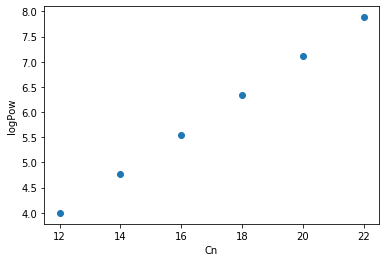

In [85]:
abbreviations = ['FA 12:0', 'FA 14:0', 'FA 16:0', 'FA 18:0', 'FA 20:0', 'FA 22:0'] # 脂肪酸分子種の略号
Cns = [12, 14, 16, 18, 20, 22] # 脂肪酸の炭素原子数（鎖長）
logPs = [3.99, 4.77, 5.55, 6.33, 7.11, 7.89] # 脂肪酸分子種のlogPowの値

plt.scatter(Cns, logPs) # 散布図の作成
plt.xlabel('Cn') # x軸ラベル
plt.ylabel('logPow') # y軸ラベル

plt.savefig('logP_saturated-fatty-acids.png') # 散布図を画像ファイル（PNGファイル）として保存
plt.show() # 出来上がった散布図を表示

上の例では、飽和脂肪酸（炭素鎖に二重結合がない脂肪酸分子種）について、炭素原子数`Cns`とlogPow`logPs`の関係を図示しています。
logPowというのは、「水オクタノール分配係数」で、化合物の疎水性の大きさを示しています。
今回は、logPowの値は、[LIPID MAPS](https://www.lipidmaps.org/)を参照しました。
見て分かるように、炭素原子数が多くなるにつれて、logPowの値も大きくなっていますね。
これは、炭素原子数が増えるにつれて、分子の疎水性が増すことを示しています。

不飽和脂肪酸（炭素鎖に二重結合がある脂肪酸分子種）についても同様に考えてみます。

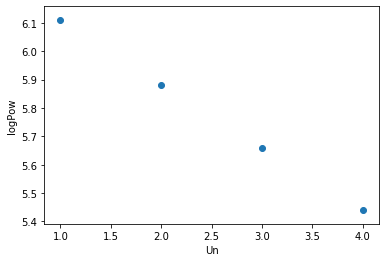

In [86]:
abbreviations = ['FA 18:1', 'FA 18:2', 'FA 18:3', 'FA 18:4']
Uns = [1, 2, 3, 4] # 脂肪酸の炭素鎖の二重結合数（不飽和度）
logPs = [6.11, 5.88, 5.66, 5.44]

plt.scatter(Uns, logPs)
plt.xlabel('Un')
plt.ylabel('logPow')

plt.savefig('logP_C18-fatty-acids.png')
plt.show()

今度は、炭素原子数は同じで、二重結合数（不飽和度）を変えた時に、logPowがどう変わるかを図示しています。
二重結合が増えるにつれて、分子の疎水性が下がることが分かります。

次に*in vitro*の実験における細胞中の脂肪酸濃度を図示することを考えます。

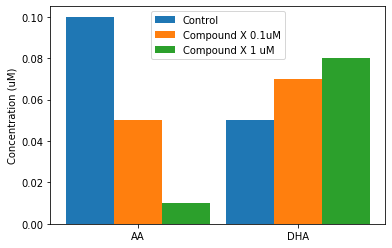

In [87]:
concs_ctrl = [0.1, 0.05] # コントロールの実験におけるアラキドン酸、ドコサヘキサエン酸の濃度
concs_cmpd_low = [0.05, 0.07] # 化合物添加（低用量）の実験におけるアラキドン酸、ドコサヘキサエン酸の濃度
concs_cmpd_high = [0.01, 0.08] # 化合物添加（高用量）の実験におけるアラキドン酸、ドコサヘキサエン酸の濃度
x = np.arange(len(concs_ctrl)) # 表示する脂肪酸の数

bar_width = 0.3 # 棒グラフの幅

plt.bar(x, concs_ctrl, width=bar_width, align='center') # Controlの条件の棒グラフ
plt.bar(x+bar_width, concs_cmpd_low, width=bar_width, align='center') # 化合物添加時（低用量）の条件の棒グラフ
plt.bar(x+bar_width*2, concs_cmpd_high, width=bar_width, align='center') # 化合物添加時（高用量）の条件の棒グラフ
plt.xticks(x+bar_width, ['AA', 'DHA']) # x軸データ名
plt.ylabel('Concentration (uM)')
plt.legend(('Control', 'Compound X 0.1uM', 'Compound X 1 uM')) # 凡例

plt.savefig('fatty acid concs.png')
plt.show()

ここでは、3種類の実験条件で、アラキドン酸（arachidonic acid: AA）とドコサヘキサエン酸（docosahexaenoic acid: DHA）の細胞中濃度がどう変わるかを示しています。
ちなみに、炭素原子数と二重結合数で表すと、AAは「FA 20:4」、DHAは「FA 22:6」です。
化合物Xを細胞に添加すると、AAの産生が抑制され、DHAの産生量が用量依存的に少しずつ増加しているのが分かりますね。
なお、今回の例ではn=1の実験データとしてグラフを作成しており、エラーバーはつけていません。

## 10. scikit-learn

scikit-learnは、機械学習用のライブラリです。

ここでは、化合物の物性値から、液体クロマトグラフィー（Liquid Chromatography: LC）における保持時間（Retention Time: RT）を、部分最小二乗（partial least squares: PLS）回帰を用いて予測することを考えてみます。

まず、機械学習に用いるデータセットを作成します。

In [88]:
params_fatty_acids = ['Heavy atoms', 'Rotatable Bonds', 'van der Waals Molecular Volume', 'logP', 'Molar Refractivity']

lauric = [14, 10, 231.10, 3.99, 59.48]
myristic = [16, 12, 265.70, 4.77, 68.71]
palmitic = [18, 14, 300.30, 5.55, 77.95]
palmitoleic = [18, 13, 297.66, 5.33, 77.85]
stearic = [20, 16, 334.90, 6.33, 87.18]
oleic = [20, 15, 332.26, 6.11, 87.09]
linoleic = [20, 14, 329.62, 5.88, 86.99]
linolenic = [20, 13, 326.98, 5.66, 86.90]
stearidonic = [20, 12, 324.34, 5.44, 86.81]
arachidic = [22, 18, 369.50, 7.11, 96.42]
bishomo_gamma_linolenic = [22, 15, 361.58, 6.44, 96.13]
arachidonic = [22, 14, 358.94, 6.22, 96.04]
eicosapentaenoic = [22, 13, 356.30, 5.99, 95.95]
behenic = [24, 20, 404.10, 7.89, 105.65]
adrenic = [24, 16, 393.54, 7.00, 105.27]
docosapentaenoic = [24, 15, 390.90, 6.77, 105.18]
docosahexaenoic = [24, 14, 388.26, 6.55, 105.09]

df_fatty_acids = pd.DataFrame([lauric, myristic, palmitic, palmitoleic, stearic, oleic, linoleic, linolenic, stearidonic, arachidic, bishomo_gamma_linolenic, arachidonic, eicosapentaenoic, behenic, adrenic, docosapentaenoic, docosahexaenoic], columns=params_fatty_acids)
df_fatty_acids['Experimental Retention Time (min)'] = [4.53, 7.52, 11.02, 10.59, 14.45, 11.86, 9.76, 8.31, 6.71, 17.52, 11.20, 9.96, 8.27, 20.40, 12.75, 11.52, 9.84]
df_fatty_acids

,Heavy atoms,Rotatable Bonds,van der Waals Molecular Volume,logP,Molar Refractivity,Experimental Retention Time (min)
0,14,10,231.10,3.99,59.48,4.53
1,16,12,265.70,4.77,68.71,7.52
2,18,14,300.30,5.55,77.95,11.02
3,18,13,297.66,5.33,77.85,10.59
4,20,16,334.90,6.33,87.18,14.45
5,20,15,332.26,6.11,87.09,11.86
6,20,14,329.62,5.88,86.99,9.76
7,20,13,326.98,5.66,86.90,8.31
8,20,12,324.34,5.44,86.81,6.71
9,22,18,369.50,7.11,96.42,17.52


ここでは、説明変数として用いる物性パラメーター名のリストを`params_fatty_acids`としています。
それぞれの物性値は[LIPID MAPS](https://www.lipidmaps.org/)のデータベースに格納されている情報を参照しています。
また、RTは、理化学研究所の[PRIMe](http://prime.psc.riken.jp/)というウェブサイトで公開されている[逆相LCにおけるRTデータ](http://prime.psc.riken.jp/Metabolomics_Software/MrmDatabase/Detail%20of%20LCQqQMS%20method%20(ODS-lipids).xlsx)を参照しています。

また、実際は`pandas.read_csv`などでCSVファイルなどを読み込むことが多いと思います。
さらに、欠損値補完などのデータ前処理が必要になることが多いです。

次に、予測モデルの構築と、モデルを用いた予測値の算出を行います。

In [89]:
from sklearn.cross_decomposition import PLSRegression


X = df_fatty_acids[params_fatty_acids] # 説明変数
y = df_fatty_acids['Experimental Retention Time (min)'] # 目的変数

pls_rt = PLSRegression()
pls_rt.fit(X, y) # PLS予測モデルを構築

y_pred = pls_rt.predict(X) # 予測値を算出

df_fatty_acids['Predicted Retention Time (min)'] = y_pred
df_fatty_acids['Diff (min)'] = df_fatty_acids['Predicted Retention Time (min)'] - df_fatty_acids['Experimental Retention Time (min)']
df_fatty_acids['Accuracy (%)'] = (df_fatty_acids['Diff (min)'] / df_fatty_acids['Experimental Retention Time (min)']) * 100
df_fatty_acids

,Heavy atoms,Rotatable Bonds,van der Waals Molecular Volume,logP,Molar Refractivity,Experimental Retention Time (min),Predicted Retention Time (min),Diff (min),Accuracy (%)
0,14,10,231.10,3.99,59.48,4.53,4.670111,0.140111,3.092949
1,16,12,265.70,4.77,68.71,7.52,7.822805,0.302805,4.026656
2,18,14,300.30,5.55,77.95,11.02,10.974997,-0.045003,-0.408373
3,18,13,297.66,5.33,77.85,10.59,9.145900,-1.444100,-13.636453
4,20,16,334.90,6.33,87.18,14.45,14.127691,-0.322309,-2.230511
5,20,15,332.26,6.11,87.09,11.86,12.298092,0.438092,3.693865
6,20,14,329.62,5.88,86.99,9.76,10.451955,0.691955,7.089703
7,20,13,326.98,5.66,86.90,8.31,8.622356,0.312356,3.758799
8,20,12,324.34,5.44,86.81,6.71,6.792757,0.082757,1.233344
9,22,18,369.50,7.11,96.42,17.52,17.279884,-0.240116,-1.370525


実測値と予測値の関係を図示してみると、以下のようになります。

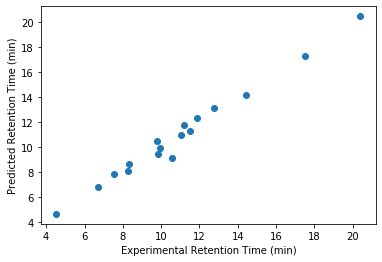

In [90]:
plt.scatter(y, y_pred)
plt.xlabel('Experimental Retention Time (min)')
plt.ylabel('Predicted Retention Time (min)')

plt.savefig('rts_fatty_acids.png')
plt.show()

今回のデータでは実測値と予測値がよく合っていそうですね。
構築したモデルの当てはまり度合いは`r2_score`で確認することができます。

In [91]:
from sklearn.metrics import r2_score


print(r2_score(y, y_pred))

0.983764472471504


`r2_score`は、0から1の間の値をとり、1に近いほど実測値と予測値がよく合っていることを示します。
今回のデータでは、`r2_score`が0.98を越える値となっており、かなり当てはまりの良いモデルということになります。

今回は、RTを予測するのに、5種類の物性パラメータを用いましたが、このうちどれが予測に大きく寄与しているのかを見てみます。

In [92]:
pls_rt.coef_

array([[-0.72946536],
       [ 3.44701558],
       [-0.20539651],
       [ 1.57377222],
       [-0.66393343]])

この結果から、今回のデータでは、Rotable Bondsに対する係数（の絶対値）が3.44と最も大きくなっており、この物性値がRTの予測に強く寄与していることが分かります。

以上で予測モデル構築に用いたデータの予測精度について議論してきましたが、最後に、モデル構築に用いなかったデータがどれほどの精度で予測できるのか見てみます。

In [93]:
lignoceric = [26, 22, 438.70, 8.67, 114.88]
x_lignoceric = pd.DataFrame([lignoceric], columns=params_fatty_acids)
y_pred_lignoceric = pls_rt.predict(x_lignoceric)

y_exp_lignoceric = 22.31 # 実測値

print(y_exp_lignoceric)
print(y_pred_lignoceric)

22.31
[[23.58527187]]


ここでは、lignoceric acid（FA 24:0）のRTを予測してみました。
予測値と実測値の乖離が1.2分程度となっています。
この差を大きいとみるか小さいとみるかは色々な見方があると思いますが、個人的にはやや予測精度が低いと思います。
理由としては、lignoceric acidが、モデル構築に用いたデータセットに含まれるどの脂肪酸分子種よりも疎水性が高い分子種であり、モデル構築の段階でlignoceric acidの物性に近いデータのfittingが行われていなかったことも関係していると考えられます。

以上のような手順でPLS回帰を行うことができます。
ここでは触れませんでしたが、PLS回帰を行うにあたり、潜在変数の数`n_components`も重要になってきます。
今回はデフォルト値の`2`を用いましたが、ここを変えることで予測精度も少しずつ変わってきます。
また別の機会に解説したいと思います。